In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modify sys.path for it to contain the main repo path so we can import modules
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from utils.data_utils import get_entire_df
from eda_and_preprocessing.preprocessing_class import Preprocessing

In [2]:
df = get_entire_df()

In [3]:
df.head()

,Transaction Name,Transaction Name URL,Organization Industries,Lead Investors,Investor Names,Money Raised,Money Raised Currency,Money Raised (in USD),Funding Type,Announced Date,...,Organization Description,Organization Website,Funding Stage,Number of Funding Rounds,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount (in USD),Equity Only Funding,Funding Status,Number of Investors
0,Seed Round - Flagright,https://www.crunchbase.com/funding_round/flagr...,"Compliance, Financial Services, FinTech, Fraud...",Moonfire Ventures,"Charles Delingpole, Donald Bringmann, Erik Mut...",2800000.0,USD,2800000.0,Seed,2022-07-07,...,AI-native AML compliance & risk management pla...,https://flagright.com,Seed,1,2800000.0,USD,2800000.0,Yes,Seed,11.0
1,Seed Round - aboutuz,https://www.crunchbase.com/funding_round/about...,"Apps, Lifestyle, Mobile, Social Media",FasterCapital,FasterCapital,632000.0,USD,632000.0,Seed,2022-03-01,...,aboutuz is the first network for users to safe...,https://www.aboutuz.com,Seed,1,632000.0,USD,632000.0,Yes,Seed,1.0
2,Seed Round - Kubermatic,https://www.crunchbase.com/funding_round/kuber...,"Enterprise, SaaS, Software",NetApp Excellerator,NetApp Excellerator,NaN,NaN,NaN,Seed,2022-04-27,...,Kubermatic empowers organizations worldwide to...,https://www.kubermatic.com,Seed,3,8300000.0,USD,8300000.0,Yes,Seed,1.0
3,Seed Round - MYNE Homes,https://www.crunchbase.com/funding_round/myne-...,"Real Estate, Real Estate Investment, Rental Pr...",NaN,"Alexander Artope, Christian Gaiser, Embedded C...",23500000.0,EUR,23938847.0,Seed,2022-07-08,...,MYNE Homes is a digital co-ownership platform ...,https://www.myne-homes.de,Seed,4,63500000.0,EUR,67268844.0,Yes,Early Stage Venture,15.0
4,Pre Seed Round - Emulate Energy,https://www.crunchbase.com/funding_round/emula...,"Energy, Energy Efficiency, Software",NaN,"AxSol, Edument, Skellefteå Kraft, Utvecklingsk...",21956027.0,SEK,2092864.0,Pre-Seed,2022-07-15,...,Emulate provides SaaS for utilities to offer b...,https://www.emulate.energy/,Seed,3,56561291.0,SEK,5396545.0,Yes,Seed,4.0


In [4]:
# Display the Organisation Industry -> a lot of values
pd.set_option('display.max_colwidth', None)

print(df['Organization Industries'])


0       Compliance, Financial Services, FinTech, Fraud Detection, Information Technology, Risk Management, Software
1                                                                             Apps, Lifestyle, Mobile, Social Media
2                                                                                        Enterprise, SaaS, Software
3                                                              Real Estate, Real Estate Investment, Rental Property
4                                                                               Energy, Energy Efficiency, Software
                                                           ...                                                     
3167                                                                                              Energy, GreenTech
3168                         Analytics, B2B, Cloud Infrastructure, E-Commerce, Predictive Analytics, SaaS, Software
3169                                Marketplace, Property Management, Re

In [5]:
def print_overview(df):
    print("\nDataset Overview:")
    print(df.info())
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

def check_for_duplicates(df):
    print("\nNumber of Duplicates:", df.duplicated().sum())

def check_distributions(df):
    """Check the distribution of numeric columns with larger x-axis labels."""
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols].hist(figsize=(15, 10), bins=40)
    
    # Set larger font size for x and y ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.suptitle('Distribution of Numeric Columns', fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_boxplots(df):
    """Plot box plots to visualize outliers in numeric columns."""
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols) // 2 + 1, 2, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

def check_for_outliers(df):
    """Check for outliers using IQR method."""
    print(f"Number of Outliers according to the IQR Method.")
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        print(f"\nNumber of outliers in {col}: {len(outliers)}")

def correlation_matrix(df):
    """Plot correlation matrix of numeric columns."""
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Numeric Columns')
    plt.show()

def run_eda(df):
    """Run the complete EDA process."""
    print_overview(df)
    check_for_duplicates(df)
    check_distributions(df)
    plot_boxplots(df)
    check_for_outliers(df)
    correlation_matrix(df)


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3172 entries, 0 to 3171
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction Name               3172 non-null   object 
 1   Transaction Name URL           3172 non-null   object 
 2   Organization Industries        3128 non-null   object 
 3   Lead Investors                 1557 non-null   object 
 4   Investor Names                 2603 non-null   object 
 5   Money Raised                   2208 non-null   float64
 6   Money Raised Currency          2219 non-null   object 
 7   Money Raised (in USD)          2208 non-null   float64
 8   Funding Type                   3172 non-null   object 
 9   Announced Date                 3172 non-null   object 
 10  Pre-Money Valuation            230 non-null    float64
 11  Pre-Money Valuation Currency   230 non-null    object 
 12  Pre-Money Valuation (in USD) 

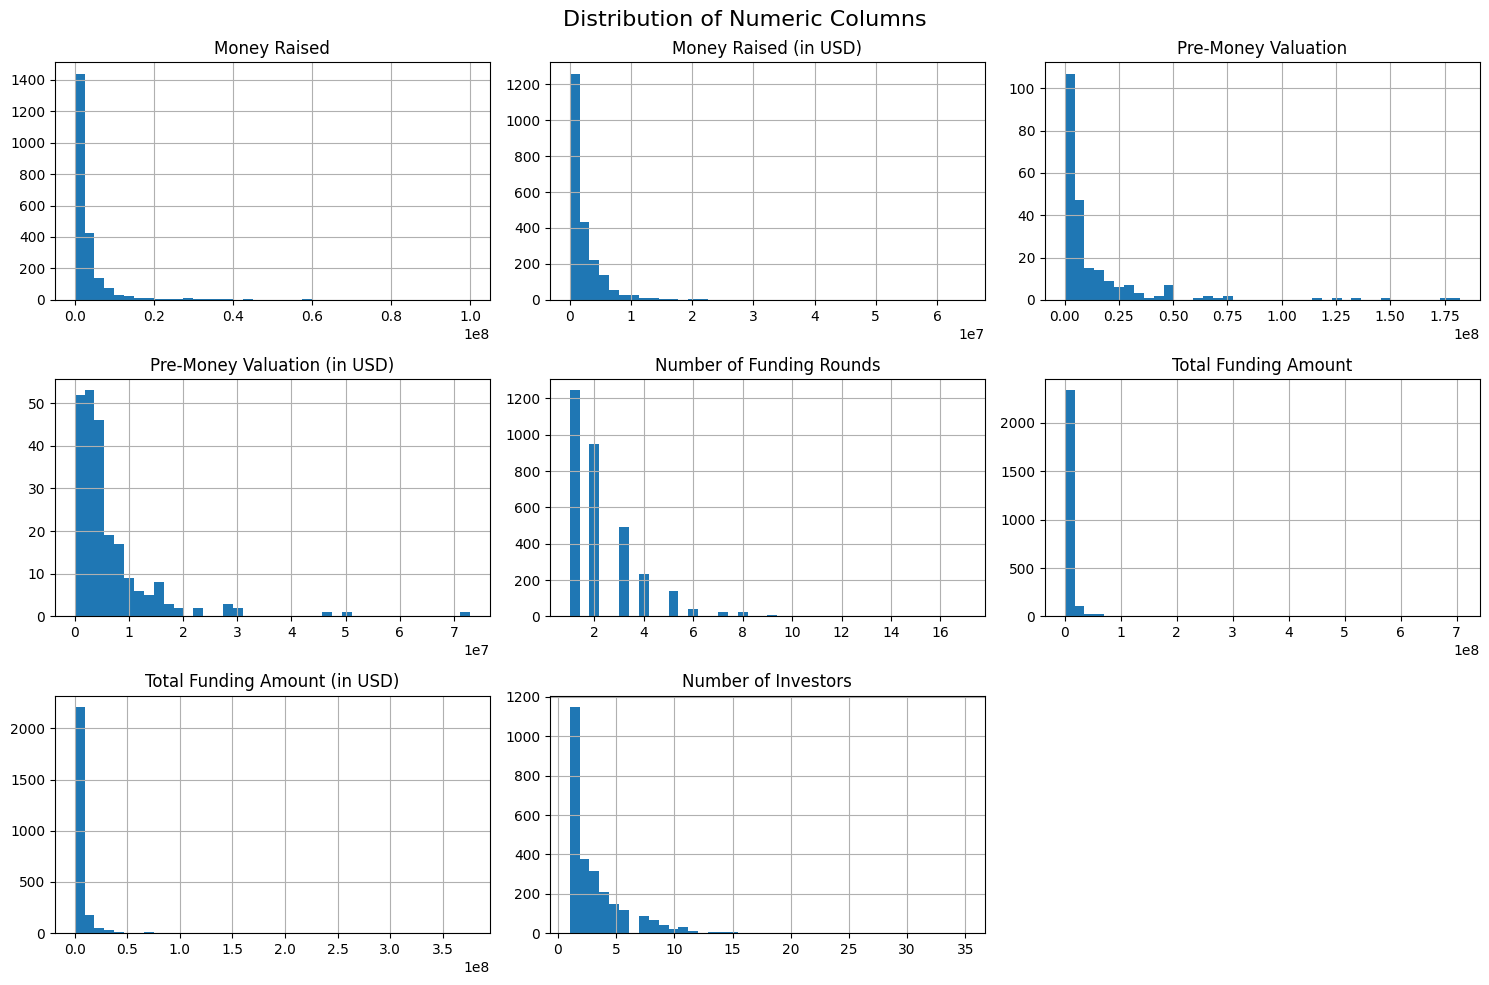

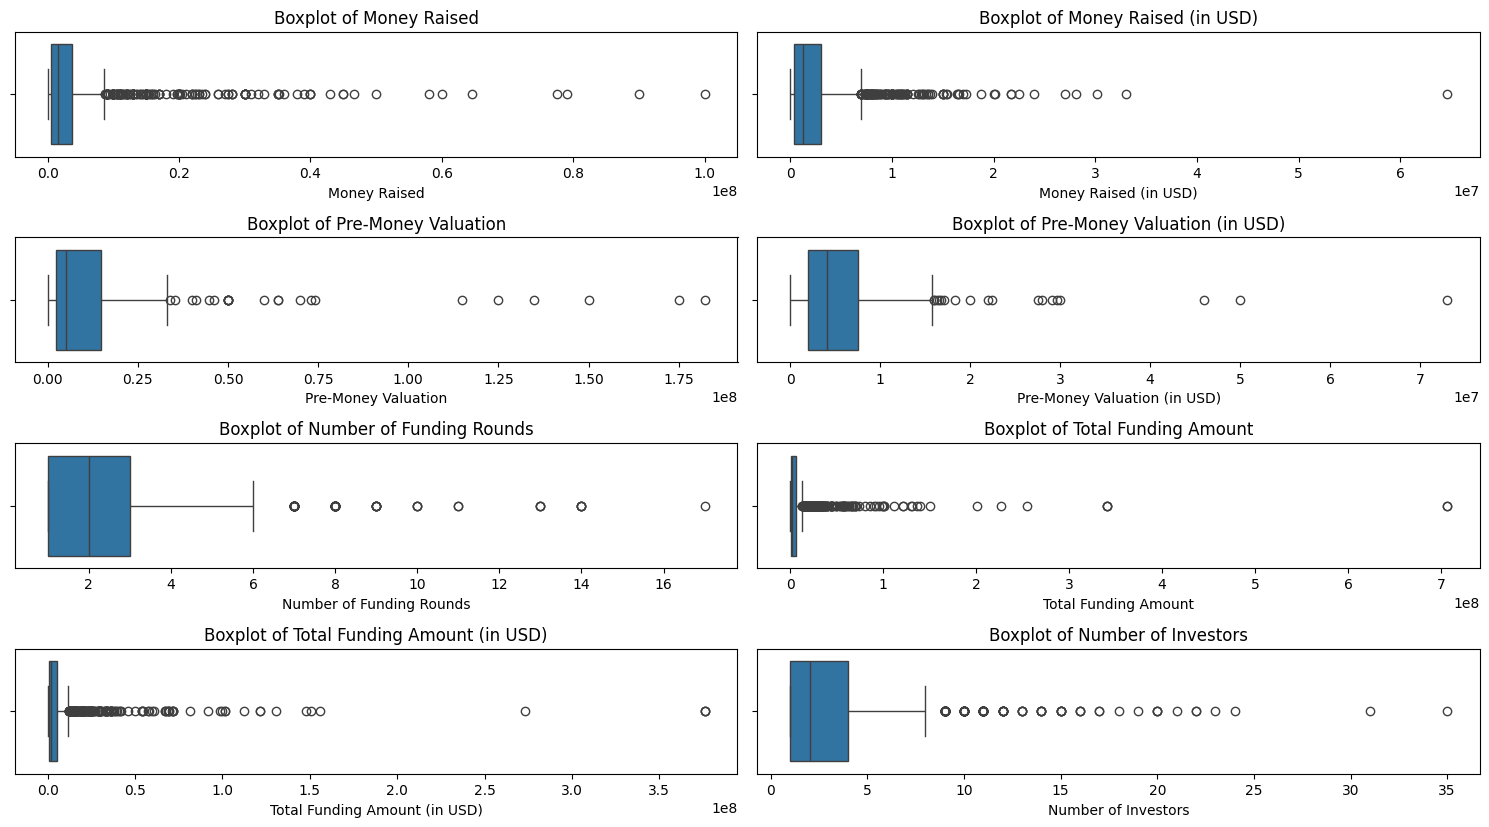

Number of Outliers according to the IQR Method.

Number of outliers in Money Raised: 172

Number of outliers in Money Raised (in USD): 133

Number of outliers in Pre-Money Valuation: 24

Number of outliers in Pre-Money Valuation (in USD): 18

Number of outliers in Number of Funding Rounds: 72

Number of outliers in Total Funding Amount: 254

Number of outliers in Total Funding Amount (in USD): 221

Number of outliers in Number of Investors: 131


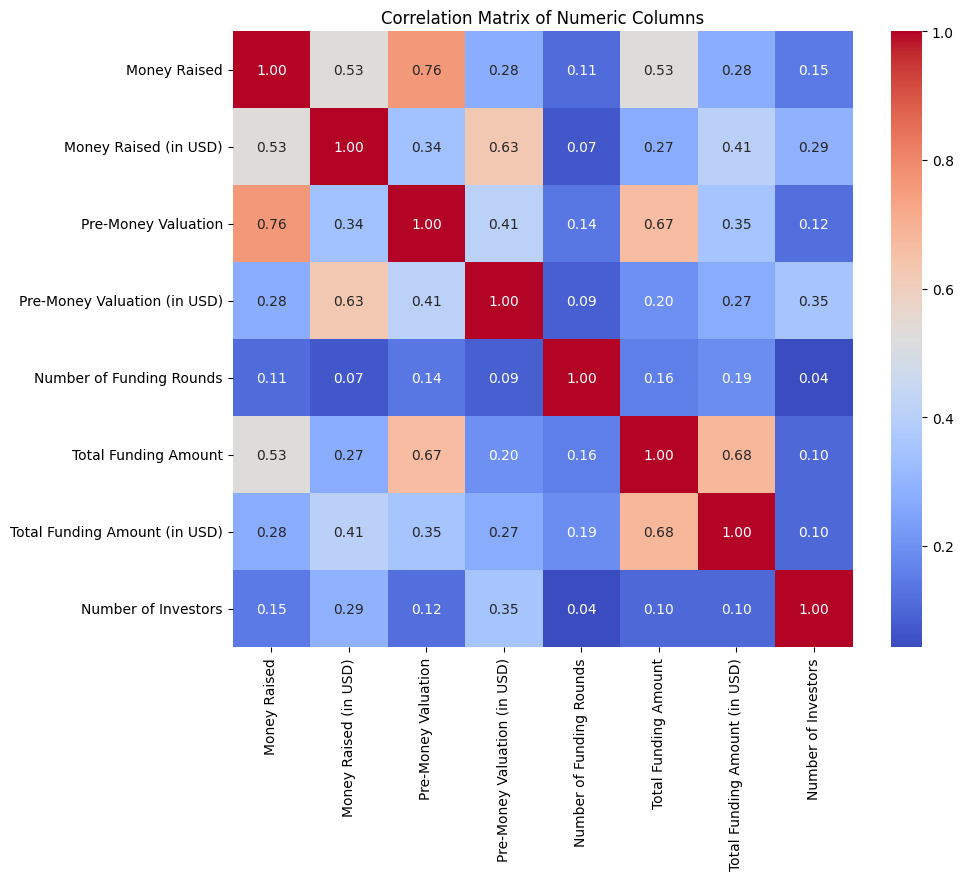

In [6]:
run_eda(df)

## Wordclouds based on organisation description

Topic 0: ['offers', 'technology', 'ai', 'services', 'solutions', 'develops', 'based', 'provides', 'company', 'software']


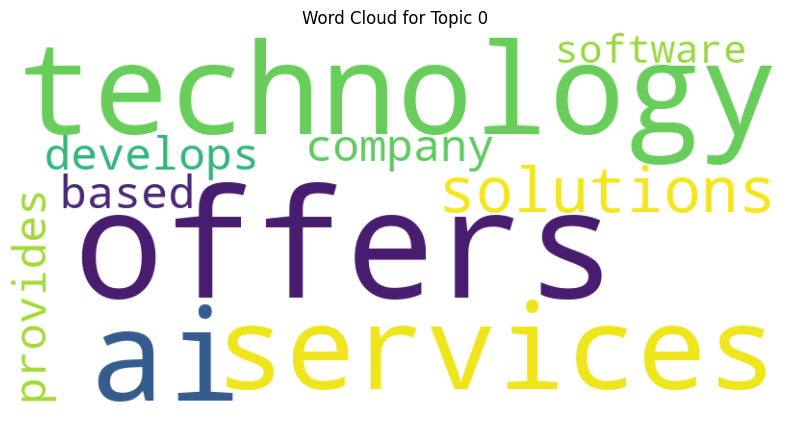

Topic 1: ['data', 'estate', 'solutions', 'tech', 'industry', 'offers', 'health', 'real', 'digital', 'platform']


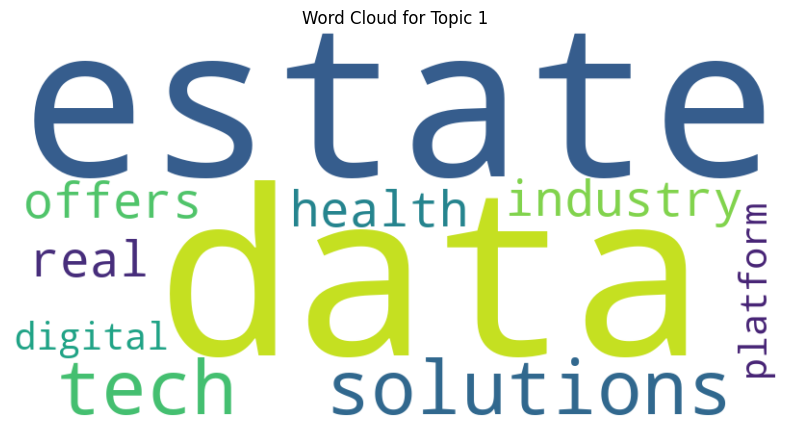

Topic 2: ['management', 'provides', 'products', 'platform', 'service', 'solution', 'saas', 'company', 'energy', 'ai']


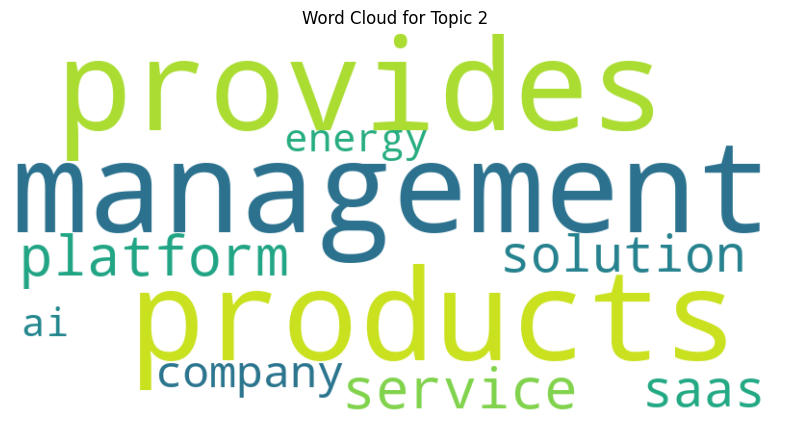

Topic 3: ['online', 'saas', 'data', 'social', 'building', 'intelligence', 'mobile', 'ai', 'app', 'platform']


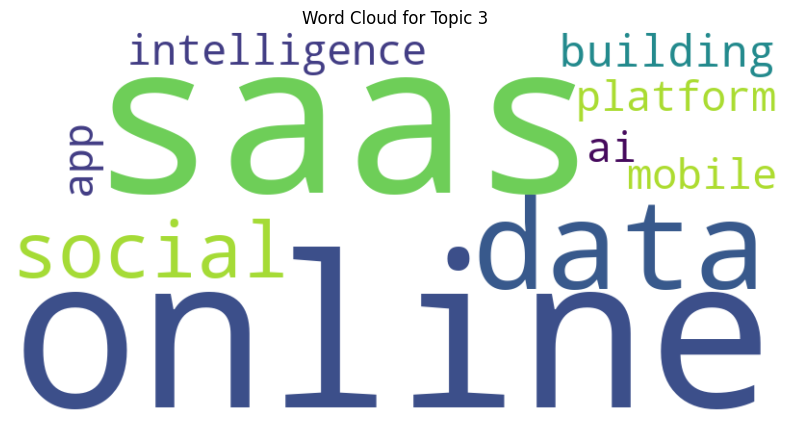

Topic 4: ['digital', 'automation', 'company', 'saas', 'management', 'helps', 'ai', 'companies', 'data', 'platform']


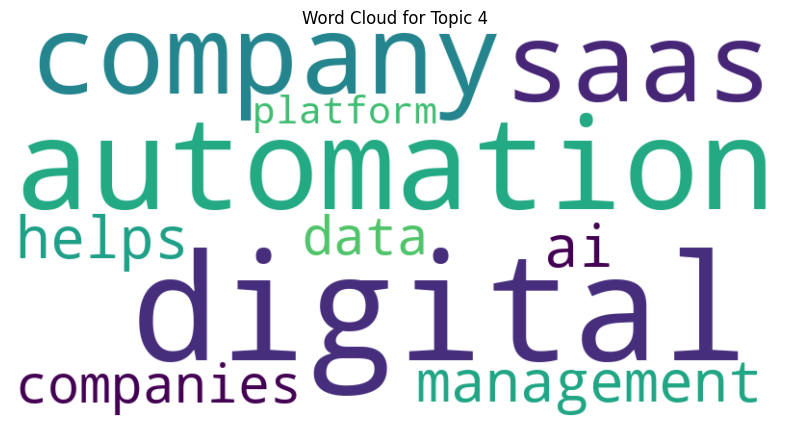

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
desc_vectorized = vectorizer.fit_transform(df['Organization Description'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(desc_vectorized)

# Print the top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]  # Get the top 30 words for each topic
    print(f"Topic {i}: {top_words}")
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {i}")
    plt.show()


## After a review of the data we can see the follwing:
1. "Organization Location" consists of City, Region, Country, Continent in the same cell. This has to be splitted up into separate columns 
2. "Organization Industries" and "Investor Names" includes many diffirent values in each cell. These has to be splitted up and put in separate tables. 
3. The following columns contain both numeric values and NaN values. "Money Raised", "Money Raised (in USD)", "Pre-Money Valuation", "Pre-Money Valuation (in USD)", "Total Funding Amount" "Total Funding Amount (in USD)"

## Suggestion on Star Schema

### FactFunding
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Transaction ID (PK)         | Unique identifier for the transaction |
| Organization ID (FK)        | Foreign key referencing DimensionOrganization |
| Money Raised                | Amount of money raised in local currency |
| Money Raised (in USD)       | Amount of money raised in USD |
| Funding Type                | Type of funding (e.g., Seed, Pre-Seed) |
| Announced Date              | Date when the funding was announced |
| Funding Stage               | Stage of funding (e.g., Seed, Series A) |
| Number of Funding Rounds    | Number of funding rounds for the organization |
| Total Funding Amount        | Total amount of funding raised in local currency |
| Total Funding Amount (in USD) | Total amount of funding raised in USD |
| Equity Only                 | Whether it was equity-only funding (Yes/No) |
| Transaction Name            | Name of the transaction            |
| Transaction Name URL        | URL of the transaction             |
| Money Raised Currency       | Currency in which money was raised |
| Pre-Money Valuation         | Valuation before the money was raised |
| Pre-Money Valuation Currency | Currency of the pre-money valuation |
| Pre-Money Valuation (in USD) | Pre-money valuation in USD         |
| Funding Status              | Status of the funding              |
| Number of Investors         | Number of investors involved       |


### DimensionOrganization
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Organization ID (PK)        | Unique identifier for the organization |
| Organization Name           | Name of the organization           |
| Location ID (FK)            | Reference to where the organization is located |
| Organization Name URL            | URL of the organization's Crunchbase profile |
| Organization Description    | Brief description of the organization |
| Organization Website        | Website of the organization        |


### DimensionLocation
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Location ID (PK)            | Unique identifier for the location |
| City                        | City where the organization is located |
| Country                     | Country where the organization is located |
| Continent                   | Continent where the organization is located |


### DimensionInvestor
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Investor ID (PK)            | Unique identifier for the investor |
| Investor                    | Name of the investor               |

### Investor Mapping Table (many-to-many)
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Transaction ID (FK)            | Unique identifier for the transaction |
| Investor ID (FK)                    | Unique identifier for the investor               |
| IsLeadInvestor                   | Bool which describes who is lead investor in a specific transaction|


### DimensionIndustry
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Industry ID (PK)            | Unique identifier for the industry |
| Industry               | Name of the industry               |

### Industry Mapping Table (many-to-many)
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Organization ID (FK)            | Unique identifier for the transaction |
| Industry ID (FK)                    | Unique identifier for the investor               |

## This star schema will be implemented by the class below. 

In [8]:
preprocessing = Preprocessing()

## Check envisioned star schema vs implementation

### FactFunding
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Transaction ID (PK)         | Unique identifier for the transaction |
| Organization ID (FK)        | Foreign key referencing DimensionOrganization |
| Money Raised                | Amount of money raised in local currency |
| Money Raised (in USD)       | Amount of money raised in USD |
| Funding Type                | Type of funding (e.g., Seed, Pre-Seed) |
| Announced Date              | Date when the funding was announced |
| Funding Stage               | Stage of funding (e.g., Seed, Series A) |
| Number of Funding Rounds    | Number of funding rounds for the organization |
| Total Funding Amount        | Total amount of funding raised in local currency |
| Total Funding Amount (in USD) | Total amount of funding raised in USD |
| Equity Only                 | Whether it was equity-only funding (Yes/No) |
| Transaction Name            | Name of the transaction            |
| Transaction Name URL        | URL of the transaction             |
| Money Raised Currency       | Currency in which money was raised |
| Pre-Money Valuation         | Valuation before the money was raised |
| Pre-Money Valuation Currency | Currency of the pre-money valuation |
| Pre-Money Valuation (in USD) | Pre-money valuation in USD         |
| Funding Status              | Status of the funding              |
| Number of Investors         | Number of investors involved       |

In [9]:
preprocessing.df.head()

,Transaction Name,Transaction Name URL,Money Raised,Money Raised Currency,Money Raised (in USD),Funding Type,Announced Date,Pre-Money Valuation,Pre-Money Valuation Currency,Pre-Money Valuation (in USD),Funding Stage,Number of Funding Rounds,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount (in USD),Equity Only Funding,Funding Status,Number of Investors,OrganizationID,TransactionID
0,Seed Round - Flagright,https://www.crunchbase.com/funding_round/flagright-seed--82849d85,2800000.0,USD,2800000.0,Seed,2022-07-07,NaN,nan,NaN,Seed,1,2800000.0,USD,2800000.0,True,Seed,11.0,1,1
1,Seed Round - aboutuz,https://www.crunchbase.com/funding_round/aboutuz-seed--9c881e5a,632000.0,USD,632000.0,Seed,2022-03-01,NaN,nan,NaN,Seed,1,632000.0,USD,632000.0,True,Seed,1.0,2,2
2,Seed Round - MYNE Homes,https://www.crunchbase.com/funding_round/myne-homes-seed--3bf4b676,23500000.0,EUR,23938847.0,Seed,2022-07-08,NaN,nan,NaN,Seed,4,63500000.0,EUR,67268844.0,True,Early Stage Venture,15.0,4,3
3,Pre Seed Round - Emulate Energy,https://www.crunchbase.com/funding_round/emulate-energy-pre-seed--71a33333,21956027.0,SEK,2092864.0,Pre-Seed,2022-07-15,63892307.0,SEK,6090260.0,Seed,3,56561291.0,SEK,5396545.0,True,Seed,4.0,5,4
4,Seed Round - Redimi,https://www.crunchbase.com/funding_round/redimi-seed--164ebdf3,25000.0,EUR,28279.0,Seed,2022-01-05,NaN,nan,NaN,Seed,2,128279.0,USD,128279.0,True,Seed,3.0,6,5


### DimensionOrganization
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Organization ID (PK)        | Unique identifier for the organization |
| Organization Name           | Name of the organization           |
| Location ID (FK)            | Reference to where the organization is located |
| Organization Name URL            | URL of the organization's Crunchbase profile |
| Organization Description    | Brief description of the organization |
| Organization Website        | Website of the organization        |

In [10]:
preprocessing.organizations_df.head()

,Organization Name,Organization Website,Organization Name URL,Organization Description,OrganizationID,LocationID
0,Flagright,https://flagright.com,https://www.crunchbase.com/organization/flagright,"AI-native AML compliance & risk management platform to monitor, screen, investigate, and report",1,1
1,aboutuz,https://www.aboutuz.com,https://www.crunchbase.com/organization/aboutuz,aboutuz is the first network for users to safely share personal details (zero-party data) with brands & people.,2,2
2,MYNE Homes,https://www.myne-homes.de,https://www.crunchbase.com/organization/myne-homes,MYNE Homes is a digital co-ownership platform for vacation properties.,4,1
3,Emulate Energy,https://www.emulate.energy/,https://www.crunchbase.com/organization/emulate-energy,Emulate provides SaaS for utilities to offer behind-the-meter services and optimize demand flexibility with virtual battery technology.,5,3
4,Redimi,https://redimi.net,https://www.crunchbase.com/organization/redimi,"The addition of digital assets to the XRP Ledger, like as gift cards, coupons, and incentive tokens.",6,1


### DimensionLocation
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Location ID (PK)            | Unique identifier for the location |
| City                        | City where the organization is located |
| Region                      | Region where the organization is located |
| Country                     | Country where the organization is located |
| Continent                   | Continent where the organization is located |


In [11]:
preprocessing.locations_df.head()

,LocationID,City,Country,Continent
0,1,Berlin,Berlin,Germany
1,2,Feldkirchen,Bayern,Germany
2,3,Lund,Skane Lan,Sweden
3,4,Starnberg,Bayern,Germany
4,5,Munich,Bayern,Germany


### DimensionInvestor
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Investor ID (PK)            | Unique identifier for the investor |
| Investor                    | Name of the investor               |

### Investor Mapping Table (many-to-many)
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Transaction ID (FK)            | Unique identifier for the transaction |
| Investor ID (FK)                    | Unique identifier for the investor               |
| IsLeadInvestor                   | Bool which describes who is lead investor in a specific transaction|


In [12]:
preprocessing.investors_df.head()

,Investor,InvestorID
0,Charles Delingpole,1
1,Donald Bringmann,2
2,Erik Muttersbach,3
3,Four Cities Capital,4
4,Fredrik Thomassen,5


In [13]:
preprocessing.investor_mapping_df.head()

,TransactionID,InvestorID,IsLeadInvestor
0,1,1,False
1,1,2,False
2,1,3,False
3,1,4,False
4,1,5,False


### DimensionIndustry
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Industry ID (PK)            | Unique identifier for the industry |
| Industry               | Name of the industry               |

### Industry Mapping Table (many-to-many)
| Column                     | Description                        |
|----------------------------|------------------------------------|
| Organization ID (FK)            | Unique identifier for the transaction |
| Industry ID (FK)                    | Unique identifier for the investor               |

In [14]:
preprocessing.industries_df.head()

,Industry,IndustryID
0,Compliance,1
1,Financial Services,2
2,FinTech,3
3,Fraud Detection,4
4,Information Technology,5


In [15]:
preprocessing.industry_mapping_df.head()

,OrganizationID,IndustryID
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
